In [1]:
import sys
sys.path.insert(1, '/Users/jeanettemumford/Dropbox/Research/Projects/RT_sims/Code')
from functions import *
import seaborn as sns
import pandas as pd
from scipy import signal
from scipy.stats import exponnorm, gamma

/Users/jeanettemumford/.pyenv/versions/3.8.5/lib/python3.8/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [2]:
# From the paper, gamma with alpha (shape) = 1.7, beta = .4 (.49 in poster!), min = .5.  Maybe beta is scale and not rate?  
# They say mean = .84s, sd = .64s
# I checked with Jack and this is what they did.  Note, the scale was incorrect 
# in the paper.  Also, if you omit the loc, the mean and sd match the paper

rt_grinband_shift = gamma.rvs(a = 1.7, loc = .5, scale = .49, size = 10000)
print('using location parameter to shift')
print(rt_grinband_shift.mean())
print(rt_grinband_shift.std())

rt_grinband_not_shifted = gamma.rvs(a = 1.7, loc = 0, scale = .49, size = 10000)
print('Unshifted')
print(rt_grinband_not_shifted.mean())
print(rt_grinband_not_shifted.std())

using location parameter to shift
1.3305409062743754
0.6305076940126102
Unshifted
0.8347840491876334
0.6347381628907972


shape (k)=6.27532495261457, mu (loc)=647.9811747089155,sigma (scale)=108.76883236842644, inv_lam=682.5597678283377
gamma fit to stroop
(4.841552936623282, 0.27339775905911773, 0.09857185489247361)


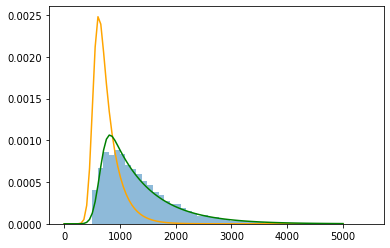

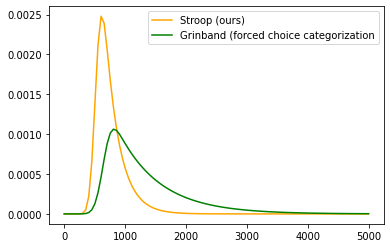

In [3]:
#further checking my exponnorm parameters are reasonable

shape_grinband_shift, mu_grinband_shift, sigma_grinband_shift  = exponnorm.fit(rt_grinband_shift*1000)
inv_lambda_grinband_shift = np.multiply(sigma_grinband_shift, 
                                            shape_grinband_shift)
print(f'shape (k)={shape_grinband_shift}, mu (loc)={mu_grinband_shift},sigma (scale)={sigma_grinband_shift}, inv_lam={inv_lambda_grinband_shift}')
x_dist = np.linspace(0, 5000, 100)
expnorm_pdf_fit_rt_grinband_shift = exponnorm.pdf(x=x_dist, 
                                                    K=shape_grinband_shift, 
                                                    loc=mu_grinband_shift,
                                                    scale=sigma_grinband_shift)
gamma_pdf = gamma.pdf(x = x_dist, a = 1.7, loc = .5*1000, scale = .49*1000)

expnorm_other = exponnorm.pdf(x=x_dist, 
                                                    K=2.94, 
                                                    loc=525.88,
                                                    scale=77.32)

data_stroop_rt = exponnorm.rvs(K=2.94, 
                                                    loc=525.88,
                                                    scale=77.32, size=5000)                                                
fit_alpha, fit_loc, fit_beta=gamma.fit(data_stroop_rt/1000)
print('gamma fit to stroop')
print((fit_alpha, fit_loc, fit_beta))

mu_explore = 930
sigma_explore = 31
lam_explore = 1/95
shape_explore  = 1 / (sigma_explore * lam_explore)
expnorm_explore = exponnorm.pdf(x=x_dist, K=shape_explore, 
                            loc=mu_explore, scale=sigma_explore) 


fig, ax = plt.subplots(1, 1)
ax.hist(rt_grinband_shift*1000, 50,  density=True, alpha = .5)
ax.plot(x_dist, expnorm_other, 'orange')
ax.plot(x_dist, expnorm_pdf_fit_rt_grinband_shift, 'green')
#ax.plot(x_dist, gamma_pdf, 'blue')
#ax.plot(x_dist, expnorm_explore, 'magenta')
plt.show()

fig, ax = plt.subplots(1, 1)
#ax.hist(rt_grinband_shift*1000, 50,  density=True, alpha = .5)
ax.plot(x_dist, expnorm_other, 'orange', label='Stroop (ours)')
ax.plot(x_dist, expnorm_pdf_fit_rt_grinband_shift, 'green', label='Grinband (forced choice categorization')
#ax.plot(x_dist, gamma_pdf, 'blue')
#ax.plot(x_dist, expnorm_explore, 'magenta')
plt.legend()
plt.show()


In [11]:
n_trials = 30
scan_length = 225
repetition_time = 1
# Parameters for RT distribution
# For midusref (avg within sub): mu=696.5963 sigma=118.8768 tau=202.3774 
#mu_expnorm = 530
#lam_expnorm = 1 / 170
#sigma_expnorm = 77

mu_expnorm = mu_grinband_shift
lam_expnorm = 1 / inv_lambda_grinband_shift
sigma_expnorm = sigma_grinband_shift

print(mu_expnorm)
print(inv_lambda_grinband_shift)
print(sigma_expnorm)

max_rt = 8000
min_rt = 50
event_duration = .5
beta_scales_yes = 5
beta_scales_no = 30
nsim = 100
center_rt=True
print(beta_scales_no)

647.9811747089155
682.5597678283377
108.76883236842644
20


In [55]:
ISI_min = 3
ISI_max = 6

#win_sub_noise_sd_range_scales_yes = [1, 1.5, 2.5, 3, 6]
win_sub_noise_sd_range_scales_yes = [1, 1.25, 1.5,2, 2.5, 3, 4, 6]
calc_cor_out_scales_yes = calc_cor_over_noise_range(100, n_trials, scan_length, repetition_time, mu_expnorm,
                    lam_expnorm, sigma_expnorm, max_rt,
                    min_rt, event_duration, ISI_min, ISI_max, win_sub_noise_sd_range_scales_yes, center_rt,
                    beta_scales_yes, beta_scales_no)
print('Scale=yes correlations')
print(calc_cor_out_scales_yes['cor_est_scales_yes_filt'])

#win_sub_noise_sd_range_scales_no = [.35, .5,  .65,1, 2]
win_sub_noise_sd_range_scales_no = [.25, .35, .5, .6,  .65, 1, 1.5, 2]
calc_cor_out_scales_no = calc_cor_over_noise_range(100, n_trials, scan_length, repetition_time, mu_expnorm,
                    lam_expnorm, sigma_expnorm, max_rt,
                    min_rt, event_duration, ISI_min, ISI_max, win_sub_noise_sd_range_scales_no, center_rt,
                    beta_scales_yes, beta_scales_no)
print('Scale=no correlations')
print(calc_cor_out_scales_no['cor_est_scales_no_filt'])


Scale=yes correlations
[0.21694023369602267, 0.1735827054500083, 0.16236770864088887, 0.11774344808910486, 0.10289740889078214, 0.08018487784681526, 0.057839425423743866, 0.03975978565985372]
Scale=no correlations
[0.2717888978124974, 0.19941635866683685, 0.1351913242678179, 0.11438100590405063, 0.11163191539345493, 0.08624518123711117, 0.05467683569013729, 0.03339026491433793]


In [56]:
nsim_pow = 1000

#win_sub_noise_sd_range = [.1,  .5,  1,  1.5,  2, 2.5, 3.5]
#win_sub_noise_sd_range = [.1, 1]
hp_filter = False
#ISI_min_max_vec = [(1, 3), (1, 4), (1,5), (1,6), (2,2), (2, 5), (3, 6), (5,5), (4, 7), (5, 8)]
ISI_min_max_vec = [(1, 3), (2, 5), (3, 6), (4, 7)]

output_unmod_beta_power_scales_yes_hp_no, output_rtmod_beta_power_scales_yes_hp_no = calc_pow_range(n_trials, scan_length, 
             repetition_time, mu_expnorm,
              lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min_max_vec, win_sub_noise_sd_range_scales_yes,  
              center_rt, beta_scales_yes, beta_scales_no, hp_filter, nsim_pow)


(1, 3)
(2, 5)
(3, 6)
(4, 7)


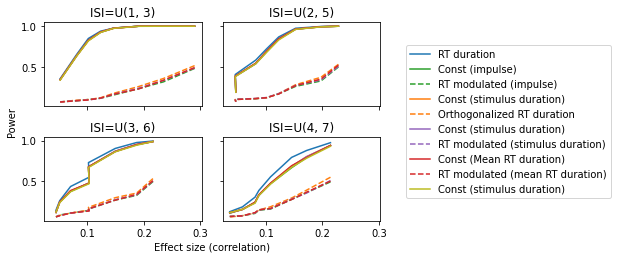

In [57]:
power_plot_1sub(output_unmod_beta_power_scales_yes_hp_no, 
                output_rtmod_beta_power_scales_yes_hp_no, 
                'dv_scales_yes', zoom=False)


In [58]:
output_unmod_beta_power_scales_no_hp_no, output_rtmod_beta_power_scales_no_hp_no = calc_pow_range(n_trials, scan_length, 
             repetition_time, mu_expnorm,
              lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min_max_vec, win_sub_noise_sd_range_scales_no,  
              center_rt, beta_scales_yes, beta_scales_no, hp_filter, nsim_pow)

(1, 3)
(2, 5)
(3, 6)
(4, 7)


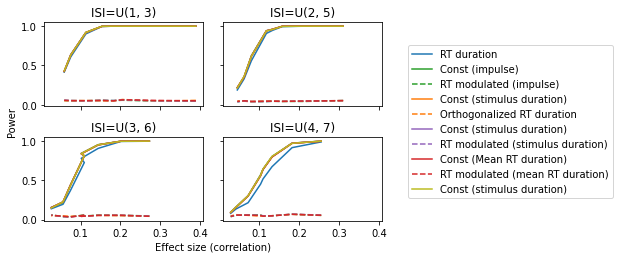

In [59]:
power_plot_1sub(output_unmod_beta_power_scales_no_hp_no, 
                output_rtmod_beta_power_scales_no_hp_no, 
                'dv_scales_no', zoom=False)

In [60]:
hp_filter = True

output_unmod_beta_power_scales_yes_hp_yes, output_rtmod_beta_power_scales_yes_hp_yes = calc_pow_range(n_trials, scan_length, 
             repetition_time, mu_expnorm,
              lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min_max_vec, win_sub_noise_sd_range_scales_yes,  
              center_rt, beta_scales_yes, beta_scales_no, hp_filter, nsim_pow)


(1, 3)
(2, 5)
(3, 6)
(4, 7)


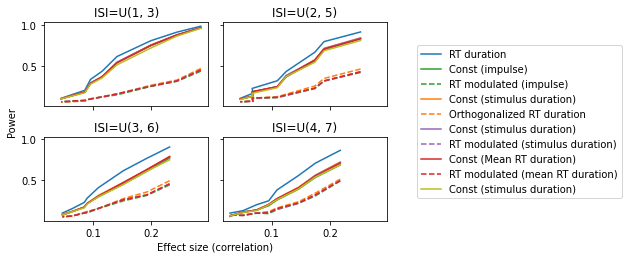

In [61]:
power_plot_1sub(output_unmod_beta_power_scales_yes_hp_yes, 
                output_rtmod_beta_power_scales_yes_hp_yes, 
                'dv_scales_yes', zoom=False)

In [62]:
output_unmod_beta_power_scales_no_hp_yes, output_rtmod_beta_power_scales_no_hp_yes = calc_pow_range(n_trials, scan_length, 
             repetition_time, mu_expnorm,
              lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min_max_vec, win_sub_noise_sd_range_scales_no,  
              center_rt, beta_scales_yes, beta_scales_no, hp_filter, nsim_pow)

(1, 3)
(2, 5)
(3, 6)
(4, 7)


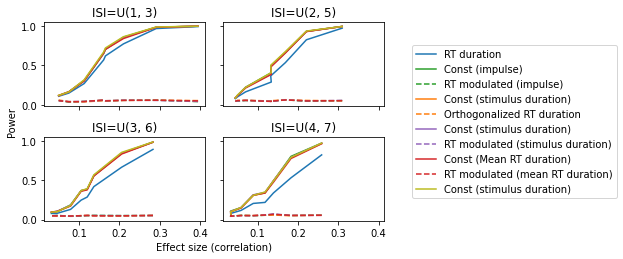

In [63]:
power_plot_1sub(output_unmod_beta_power_scales_no_hp_yes, 
                output_rtmod_beta_power_scales_no_hp_yes, 
                'dv_scales_no', zoom=False)

In [64]:
# Other RT settings

mu_expnorm = 525
lam_expnorm = 1 / 166
sigma_expnorm = 77
hp_filter = True


output_unmod_beta_power_stroop_scales_yes_hp_yes, output_rtmod_beta_power_stroop_scales_yes_hp_yes = calc_pow_range(n_trials, scan_length, 
             repetition_time, mu_expnorm,
              lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min_max_vec, win_sub_noise_sd_range_scales_yes,  
              center_rt, beta_scales_yes, beta_scales_no, hp_filter, nsim_pow)


(1, 3)
(2, 5)
(3, 6)
(4, 7)


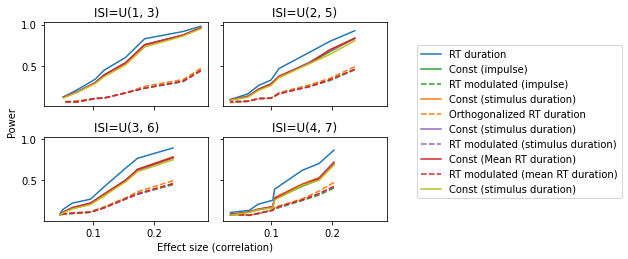

In [65]:
power_plot_1sub(output_unmod_beta_power_stroop_scales_yes_hp_yes, 
                output_rtmod_beta_power_stroop_scales_yes_hp_yes, 
                'dv_scales_yes', zoom=False)

In [66]:
output_unmod_beta_power_stroop_scales_no_hp_yes, output_rtmod_beta_power_stroop_scales_no_hp_yes = calc_pow_range(n_trials, scan_length, 
             repetition_time, mu_expnorm,
              lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min_max_vec, win_sub_noise_sd_range_scales_no,  
              center_rt, beta_scales_yes, beta_scales_no, hp_filter, nsim_pow)

(1, 3)
(2, 5)
(3, 6)
(4, 7)


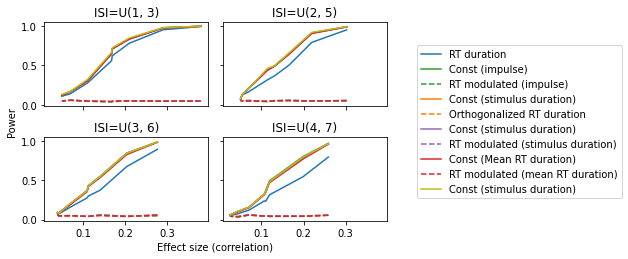

In [67]:
power_plot_1sub(output_unmod_beta_power_stroop_scales_no_hp_yes, 
                output_rtmod_beta_power_stroop_scales_no_hp_yes, 
                'dv_scales_no', zoom=False)